In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/sahil/Downloads/retail_sales_dataset.csv")

# Display the first few rows
print(df.head())

# Get basic info
print(df.info())

# Get summary statistics
print(df.describe(include='all'))


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [2]:
# Retail Sales Data Science Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime

# Load Data
df = pd.read_csv("C:/Users/sahil/Downloads/retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])



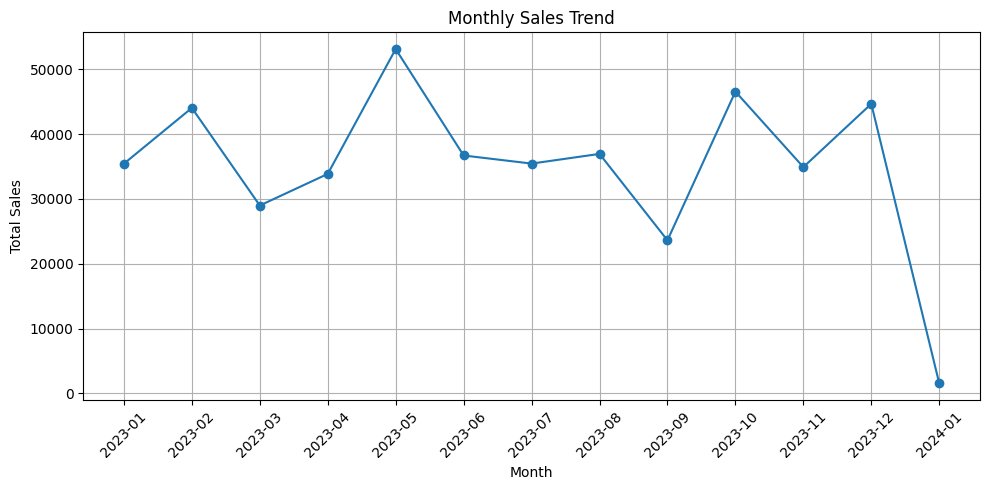

In [3]:
# 1. Sales Trend Analysis
# -----------------------------
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].astype(str)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Date'], monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# 2. Customer Segmentation (RFM)
# -----------------------------
latest_date = df['Date'].max()
rfm = df.groupby('Customer ID').agg({
    'Date': lambda x: (latest_date - x.max()).days,  # Recency
    'Transaction ID': 'count',                      # Frequency
    'Total Amount': 'sum'                           # Monetary
}).rename(columns={'Date': 'Recency', 'Transaction ID': 'Frequency', 'Total Amount': 'Monetary'})

print("\nRFM Head:")
print(rfm.head())


RFM Head:
             Recency  Frequency  Monetary
Customer ID                              
CUST001           38          1       150
CUST002          308          1      1000
CUST003          353          1        30
CUST004          225          1       500
CUST005          240          1       100


C:\Users\sahil\AppData\Local\Temp\ipykernel_21756\1304356662.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


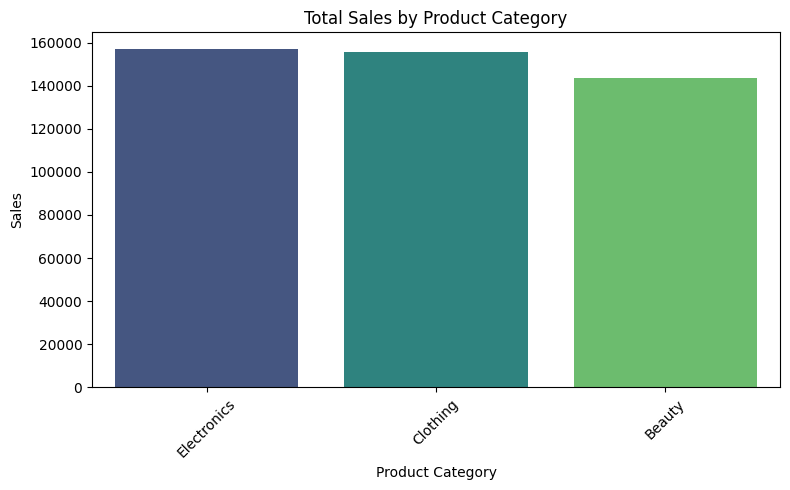

In [5]:
# 3. Product Category Analysis
# -----------------------------
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


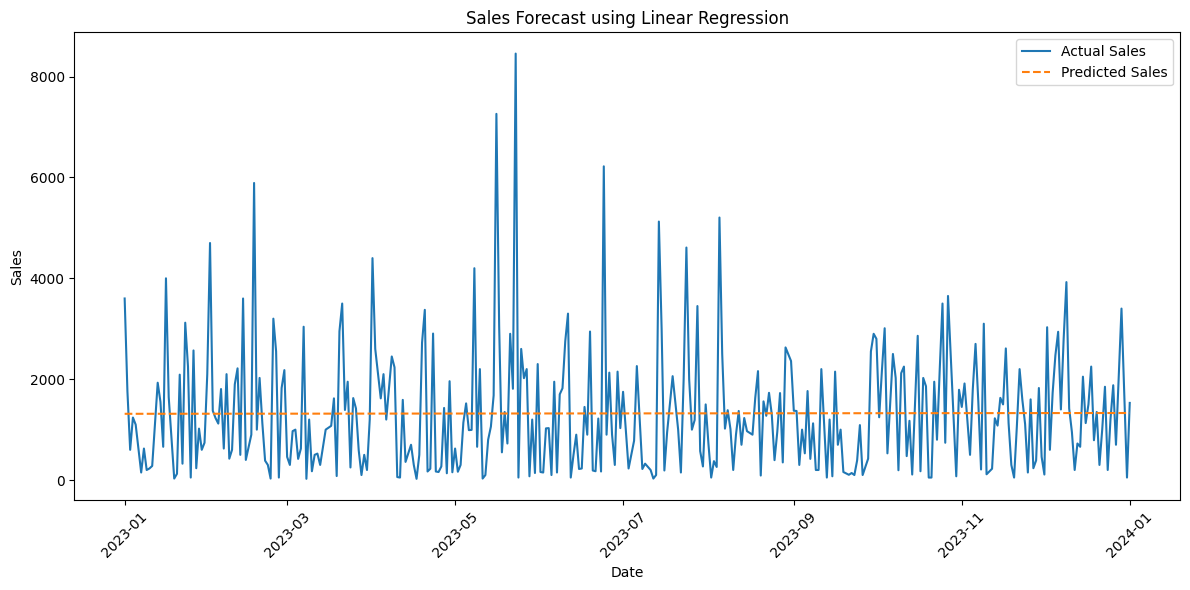

In [6]:
# 4. Sales Forecasting (Linear Regression)
# -----------------------------
daily_sales = df.groupby(df['Date'].dt.date)['Total Amount'].sum().reset_index()
daily_sales['Day_Number'] = np.arange(len(daily_sales))

X = daily_sales[['Day_Number']]
y = daily_sales['Total Amount']

model = LinearRegression()
model.fit(X, y)

daily_sales['Prediction'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], label='Actual Sales')
plt.plot(daily_sales['Date'], daily_sales['Prediction'], label='Predicted Sales', linestyle='--')
plt.title('Sales Forecast using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()